# LLM Benchmarking Graphics

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import json
import os
import sys

# Scraping

## Cellular Reprogramming Search Terms

### Compile Results

In [2]:
import os
import json

logpaths = "/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm"
results = {}

# Iterate over each subdirectory in the logpaths
for subdir in os.listdir(logpaths):
    subdir_path = os.path.join(logpaths, subdir)
    if os.path.isdir(subdir_path):
        log_file = os.path.join(subdir_path, "log.json")
        
        # Check if log.json exists in the subdirectory
        print(log_file)
        if os.path.isfile(log_file):
            with open(log_file, 'r') as file:
                data = json.load(file)
                
                # Access the specific location in the JSON structure
                step_data = data['0']["process"]["steps"][0]
                llm = step_data['llm']
                search_term = step_data['parsedOutput']['search_terms']
                words = []
                for term in search_term:
                    words += term.split()
                results[llm] = {
                    'search terms': search_term,
                    'numTerms': len(search_term),
                    'words' : words
                }

# Now results dictionary contains the desired information
print(results)

uniqueTerms, uniqueWords = [], []
for llm in results.keys():
    uniqueTerms = uniqueTerms + results[llm]['search terms']
print(len(uniqueTerms))
uniqueTerms = list(set(uniqueTerms))
print(len(uniqueTerms))
for term in uniqueTerms:
    uniqueWords = uniqueWords + term.split()
uniqueWords = list(set(uniqueWords))
print(len(uniqueWords))


/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/2024-07-23_15-45-50/log.json
/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/2024-07-23_15-35-19/log.json
/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/2024-07-23_15-45-27/log.json
/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/2024-07-23_15-45-10/log.json
/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/2024-07-23_15-35-33/log.json
/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/2024-07-23_15-45-35/log.json
/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/cellular-reprogramming/log.json
/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/foundation-models/log.json
/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/pore-c/log.json
/nfs/turbo/umms-indikar/shared/

### Test Graphics

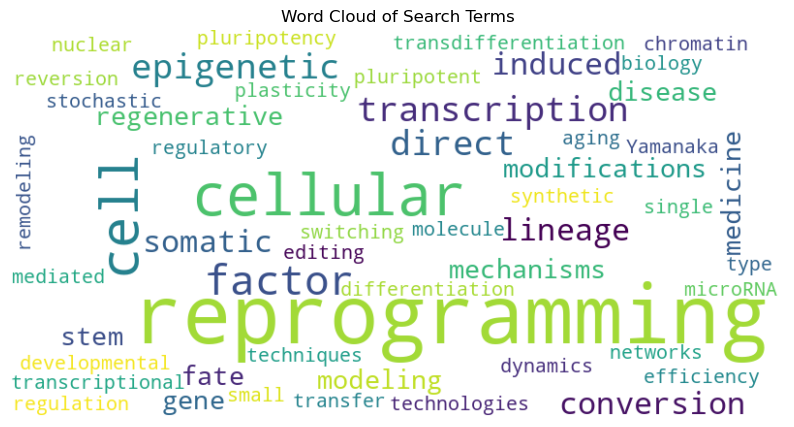

In [84]:
search_term_text = ' '.join(uniqueTerms)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(search_term_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Search Terms')
plt.axis('off')
plt.show()


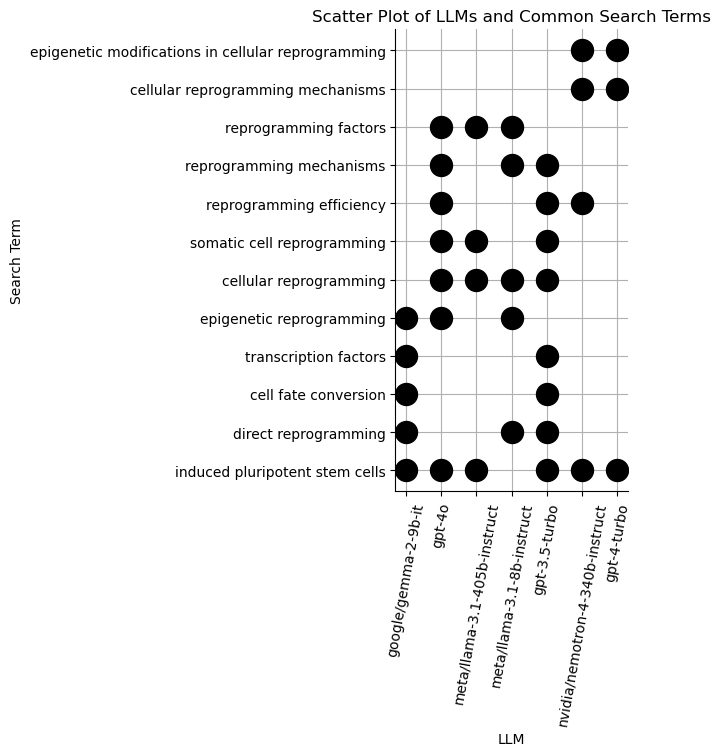

In [90]:
llm_search_term_matrix = {llm: Counter(results[llm]['search terms']) for llm in results}

# Transform the dictionary into a DataFrame
df = pd.DataFrame(llm_search_term_matrix).fillna(0).astype(int)

# Transpose the DataFrame
df = df.T

# Filter search terms that appear in at least 2 LLMs
filtered_df = df.loc[:, (df > 0).sum(axis=0) >= 2]

# Create a scatter plot
plt.figure(figsize=(3, 6))
plt.grid(True)
for i, llm in enumerate(filtered_df.index):
    for j, term in enumerate(filtered_df.columns):
        if filtered_df.at[llm, term] > 0:
            plt.scatter(i, j, s=250, zorder=10, color='k')  # s is the size of the scatter plot circles

# Add labels and titles
plt.title('Scatter Plot of LLMs and Common Search Terms')
plt.xlabel('LLM')
plt.ylabel('Search Term')

# Set x-ticks and y-ticks
plt.yticks(range(len(filtered_df.columns)), filtered_df.columns)
plt.xticks(range(len(filtered_df.index)), filtered_df.index, rotation=80)
sns.despine()
plt.show()

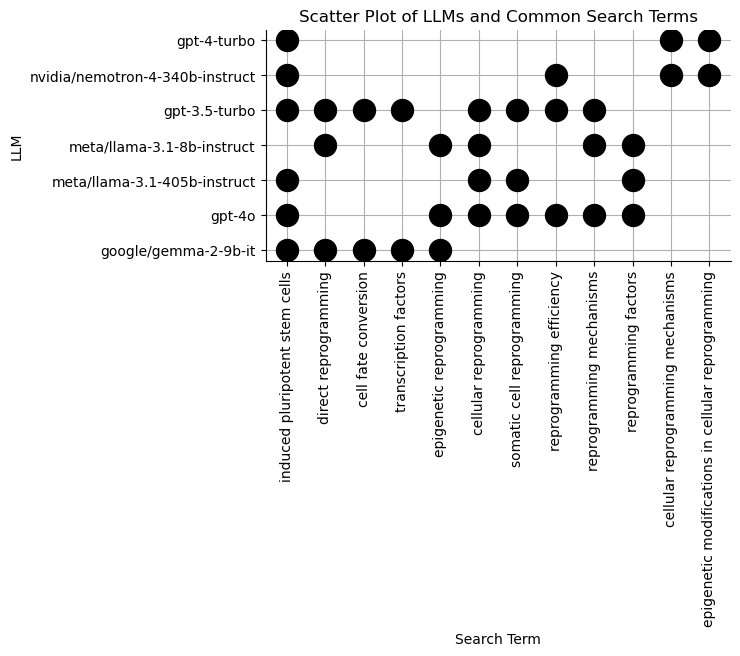

In [89]:
llm_search_term_matrix = {llm: Counter(results[llm]['search terms']) for llm in results}

# Transform the dictionary into a DataFrame
df = pd.DataFrame(llm_search_term_matrix).fillna(0).astype(int)

# Transpose the DataFrame
df = df.T

# Filter search terms that appear in at least 2 LLMs
filtered_df = df.loc[:, (df > 0).sum(axis=0) >= 2]

# Create a scatter plot
plt.figure(figsize=(6, 3))
plt.grid(True)
for i, llm in enumerate(filtered_df.index):
    for j, term in enumerate(filtered_df.columns):
        if filtered_df.at[llm, term] > 0:
            plt.scatter(j, i, s=250, zorder=10, color='k')  # s is the size of the scatter plot circles

# Add labels and titles
plt.title('Scatter Plot of LLMs and Common Search Terms')
plt.ylabel('LLM')
plt.xlabel('Search Term')

# Set x-ticks and y-ticks
plt.xticks(range(len(filtered_df.columns)), filtered_df.columns, rotation=90)
plt.yticks(range(len(filtered_df.index)), filtered_df.index, rotation=0)
sns.despine()
plt.show()

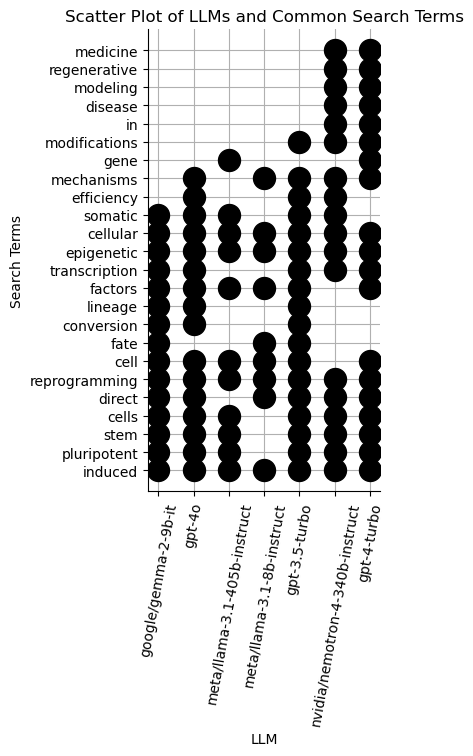

In [95]:
llm_search_term_matrix = {llm: Counter(results[llm]['words']) for llm in results}

# Transform the dictionary into a DataFrame
df = pd.DataFrame(llm_search_term_matrix).fillna(0).astype(int)

# Transpose the DataFrame
df = df.T

# Filter search terms that appear in at least 2 LLMs
filtered_df = df.loc[:, (df > 0).sum(axis=0) >= 2]

# Create a scatter plot
plt.figure(figsize=(3, 6))
plt.grid(True)
for i, llm in enumerate(filtered_df.index):
    for j, term in enumerate(filtered_df.columns):
        if filtered_df.at[llm, term] > 0:
            plt.scatter(i, j, s=250, zorder=10, color='k')  # s is the size of the scatter plot circles

# Add labels and titles
plt.title('Scatter Plot of LLMs and Common Search Terms')
plt.xlabel('LLM')
plt.ylabel('Search Terms')

# Set x-ticks and y-ticks
plt.yticks(range(len(filtered_df.columns)), filtered_df.columns)
plt.xticks(range(len(filtered_df.index)), filtered_df.index, rotation=80)
sns.despine()
plt.show()

### Proposed Graphic

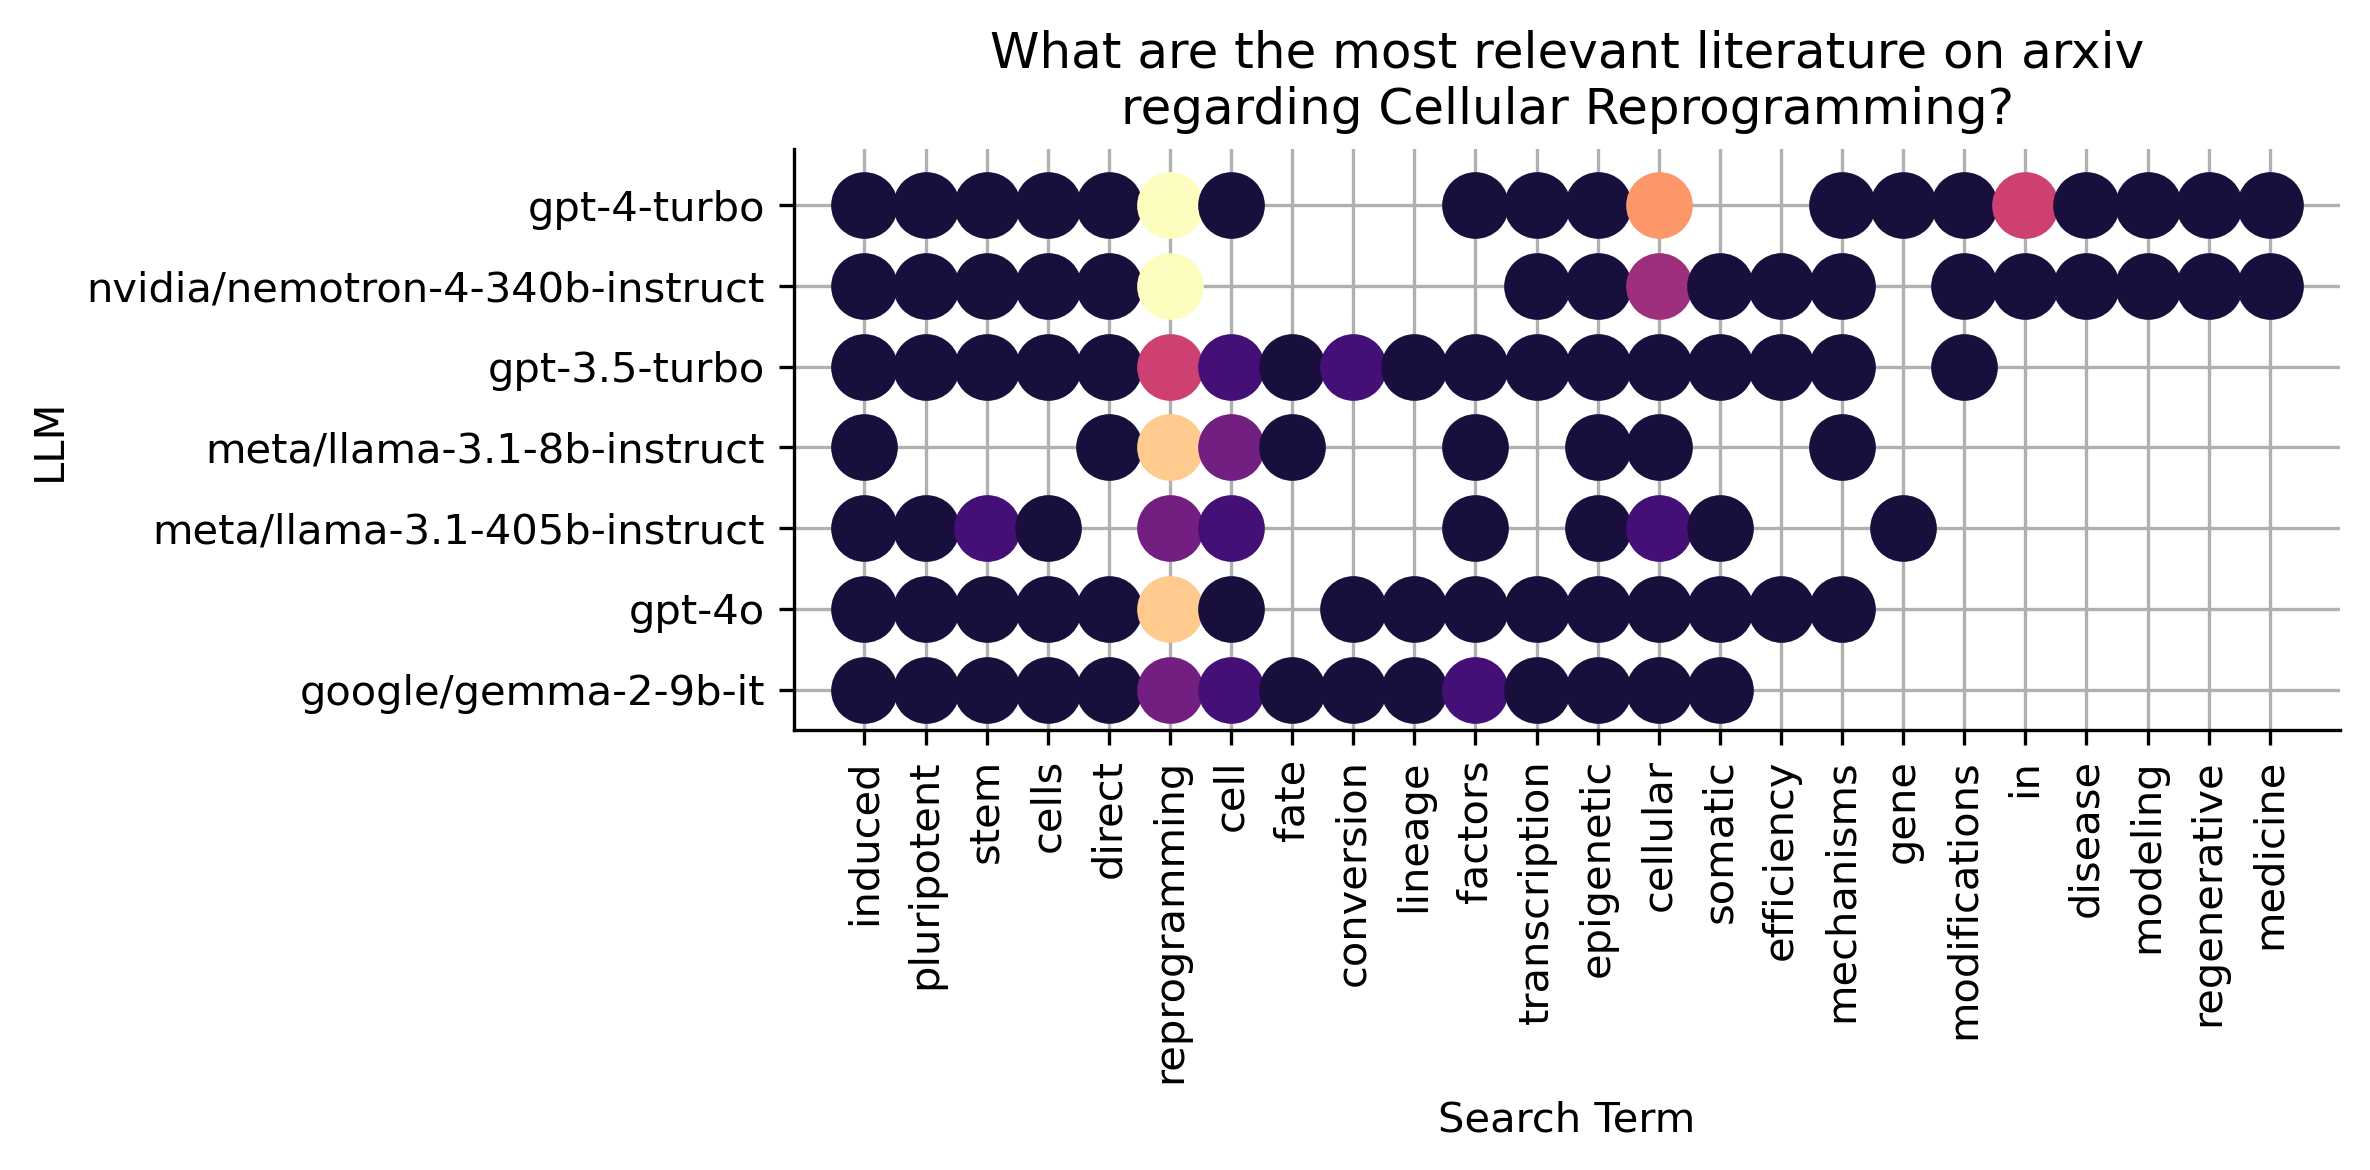

In [27]:
llm_search_term_matrix = {llm: Counter(results[llm]['words']) for llm in results}

# Transform the dictionary into a DataFrame
df = pd.DataFrame(llm_search_term_matrix).fillna(0).astype(int)

# Transpose the DataFrame
df = df.T

# Filter search terms that appear in at least 2 LLMs
filtered_df = df.loc[:, (df > 0).sum(axis=0) >= 2]

# Define a colormap
cmap = plt.get_cmap("magma")

# Get the max frequency for normalization
max_freq = filtered_df.max().max()

# Create a scatter plot
plt.figure(figsize=(8, 4), dpi=300)
plt.grid(True)
for i, llm in enumerate(filtered_df.index):
    for j, term in enumerate(filtered_df.columns):
        if filtered_df.at[llm, term] > 0:
            color = cmap(filtered_df.at[llm, term] / max_freq)
            plt.scatter(j, i, s=225, zorder=10, color=color)

# Add labels and titles
plt.title('What are the most relevant literature on arxiv\nregarding Cellular Reprogramming?')
plt.ylabel('LLM')
plt.xlabel('Search Term')

# Set x-ticks and y-ticks
plt.xticks(range(len(filtered_df.columns)), filtered_df.columns, rotation=90)
plt.yticks(range(len(filtered_df.index)), filtered_df.index, rotation=0)
plt.ylim([-0.5, 6.7])
sns.despine()
plt.tight_layout()
plt.savefig('llm-benchmark-reprogramming.png')
plt.show()

### Bar Graphic

In [103]:
stopwords = ['for',
             'of',
             'in',
             'and']
llm_search_term_matrix = {llm: Counter(results[llm]['words']) for llm in results}
df = pd.DataFrame(llm_search_term_matrix).fillna(0).astype(int)
df = df.reset_index().melt(id_vars='index', var_name='model', value_name='count')
df['word'] = df['index']
df = df[df['count'] != 0]
df

,index,model,count,word
0,induced,google/gemma-2-9b-it,1,induced
1,pluripotent,google/gemma-2-9b-it,1,pluripotent
2,stem,google/gemma-2-9b-it,1,stem
3,cells,google/gemma-2-9b-it,1,cells
4,direct,google/gemma-2-9b-it,1,direct
...,...,...,...,...
413,medicine,gpt-4-turbo,1,medicine
416,editing,gpt-4-turbo,1,editing
417,and,gpt-4-turbo,2,and
418,aging,gpt-4-turbo,1,aging


In [4]:
thresh = 5

In [116]:
stopwords = ['for',
             'of',
             'in',
             'and']
llm_search_term_matrix = {llm: Counter(results[llm]['words']) for llm in results}
df = pd.DataFrame(llm_search_term_matrix).fillna(0).astype(int)
df = df.reset_index().melt(id_vars='index', var_name='model', value_name='count')
df['word'] = df['index']
df = df[df['count'] != 0]
word_counts = {}
for r in range(df.shape[0]):
    word = df['word'].values[r]
    c    = df['count'].values[r]
    if word not in word_counts.keys():
        word_counts[word] = 0
    word_counts[word] += c
for word, counts in word_counts.items():
    if counts < thresh:
        stopwords.append(word)
df = df[~df['word'].isin(stopwords)]
df
# remove rows with words that do not occur very often (less than 3 times)


,index,model,count,word
0,induced,google/gemma-2-9b-it,1,induced
1,pluripotent,google/gemma-2-9b-it,1,pluripotent
2,stem,google/gemma-2-9b-it,1,stem
3,cells,google/gemma-2-9b-it,1,cells
4,direct,google/gemma-2-9b-it,1,direct
...,...,...,...,...
371,factors,gpt-4-turbo,1,factors
372,transcription,gpt-4-turbo,1,transcription
373,epigenetic,gpt-4-turbo,1,epigenetic
374,cellular,gpt-4-turbo,7,cellular


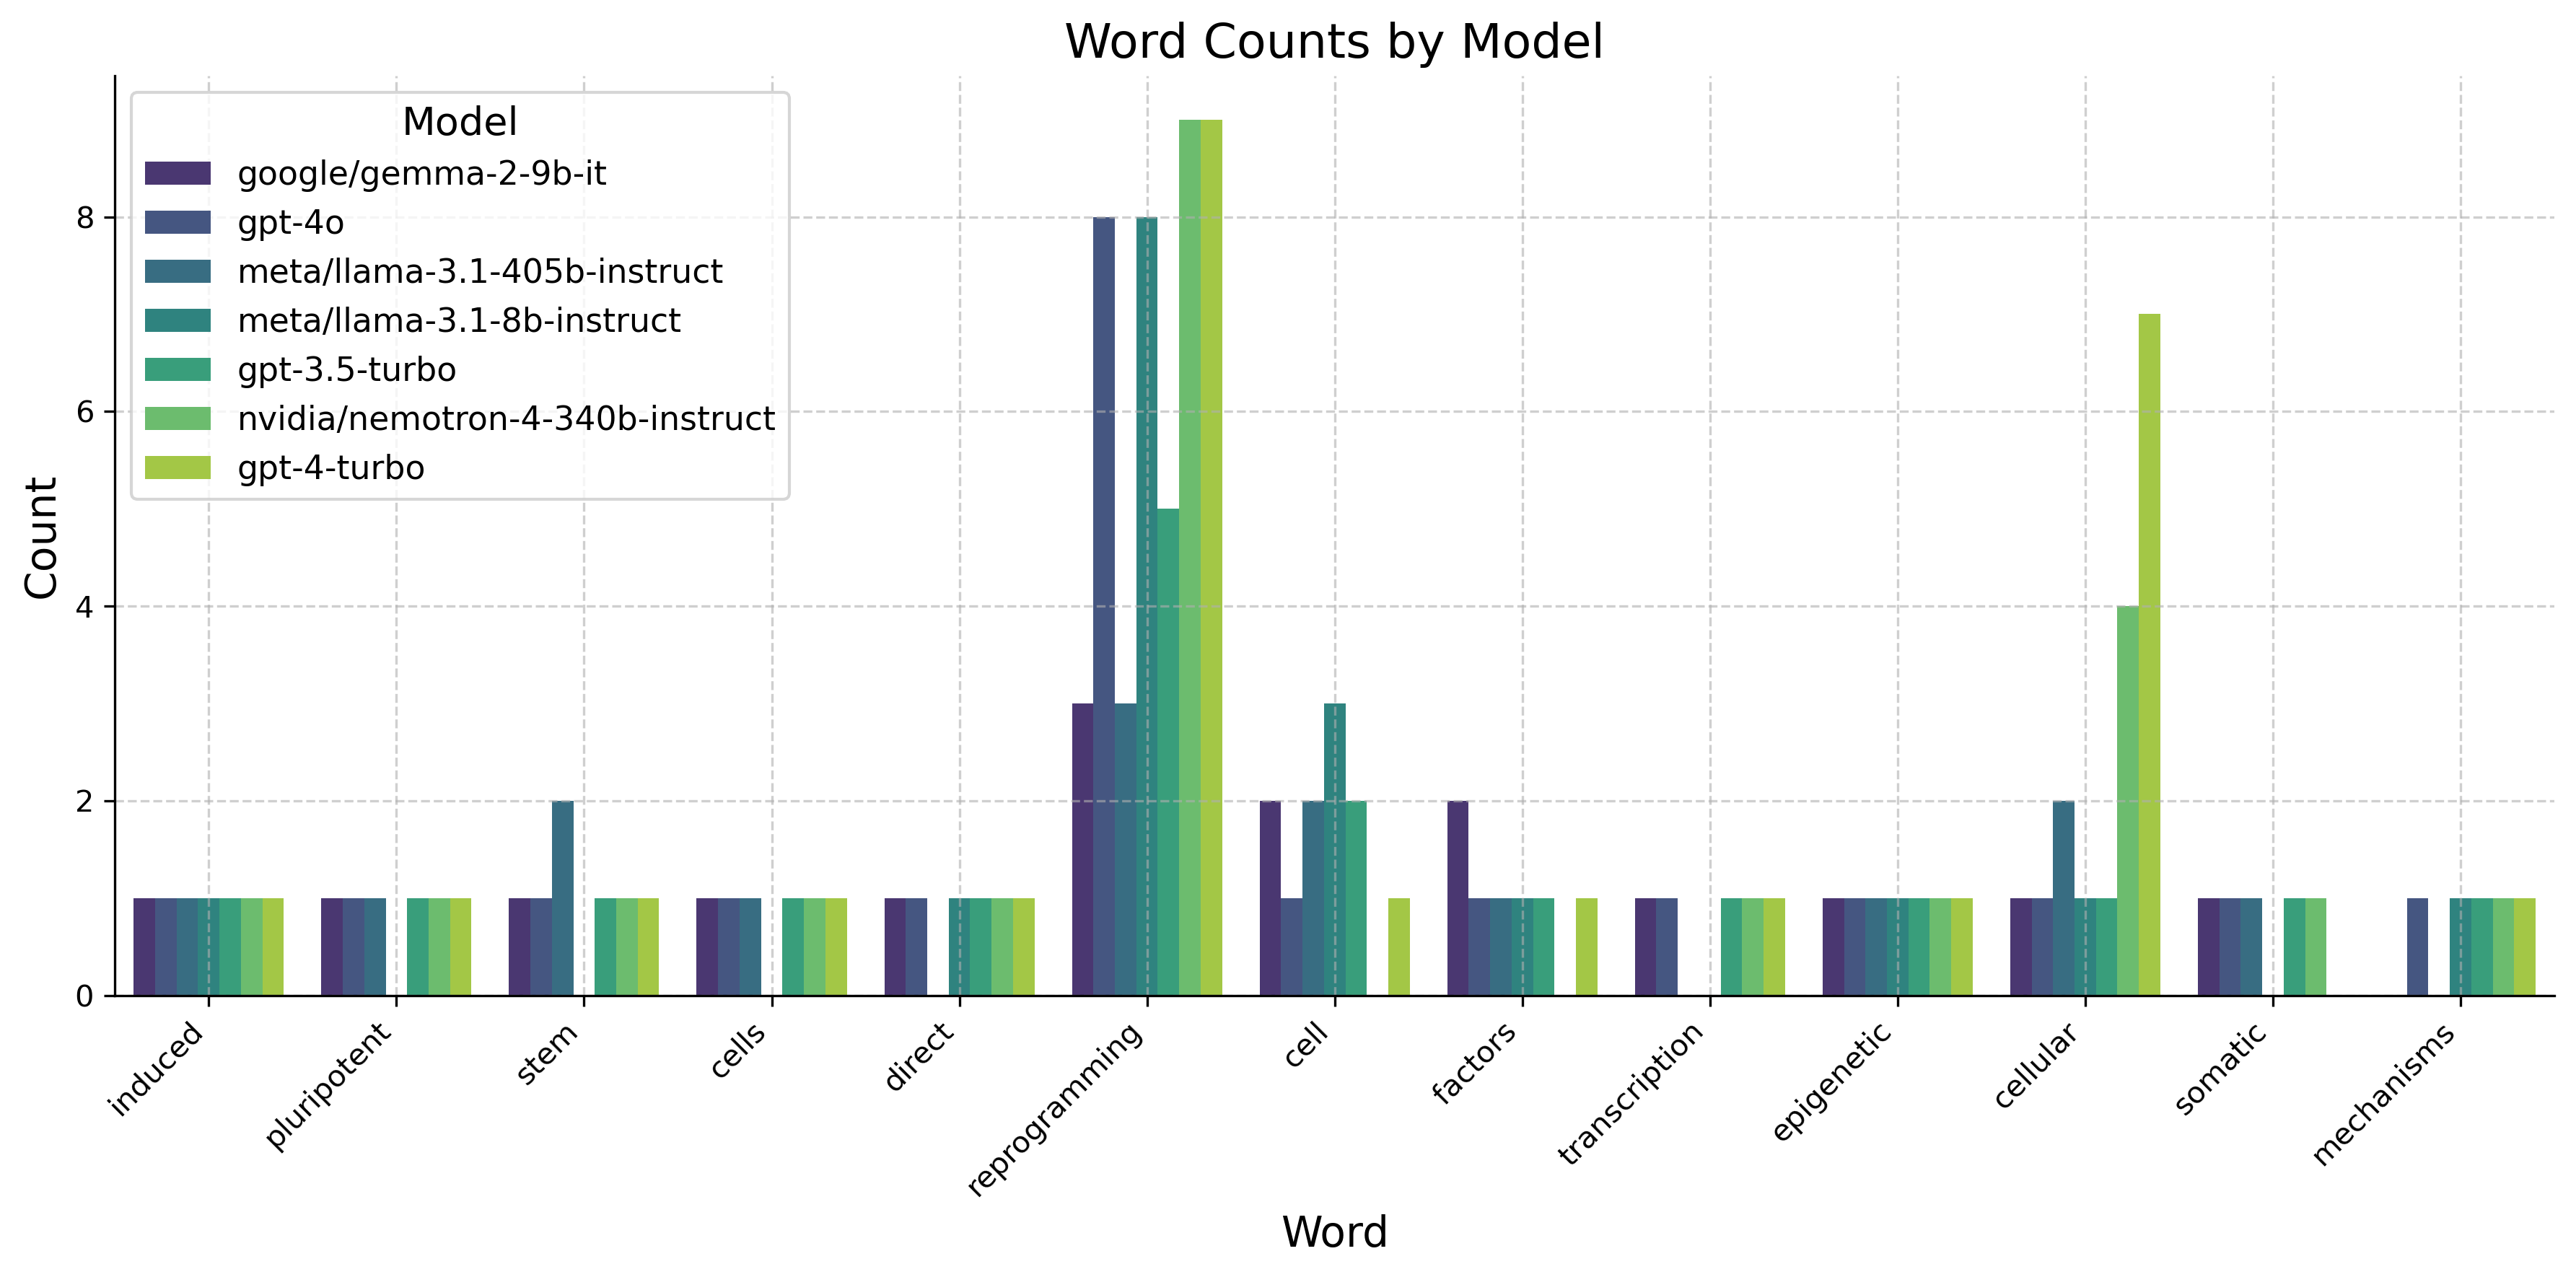

In [117]:
plt.figure(figsize=(12, 6), dpi=300)
ax = sns.barplot(data=df,
                 x='word',
                 y='count',
                 hue='model',
                 palette='viridis')

# Customize the plot
ax.set_title('Word Counts by Model', fontsize=16)
ax.set_xlabel('Word', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend(title='Model', title_fontsize='13', fontsize='11')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
sns.despine()  # Remove spines for a cleaner look

# Show grid lines
ax.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

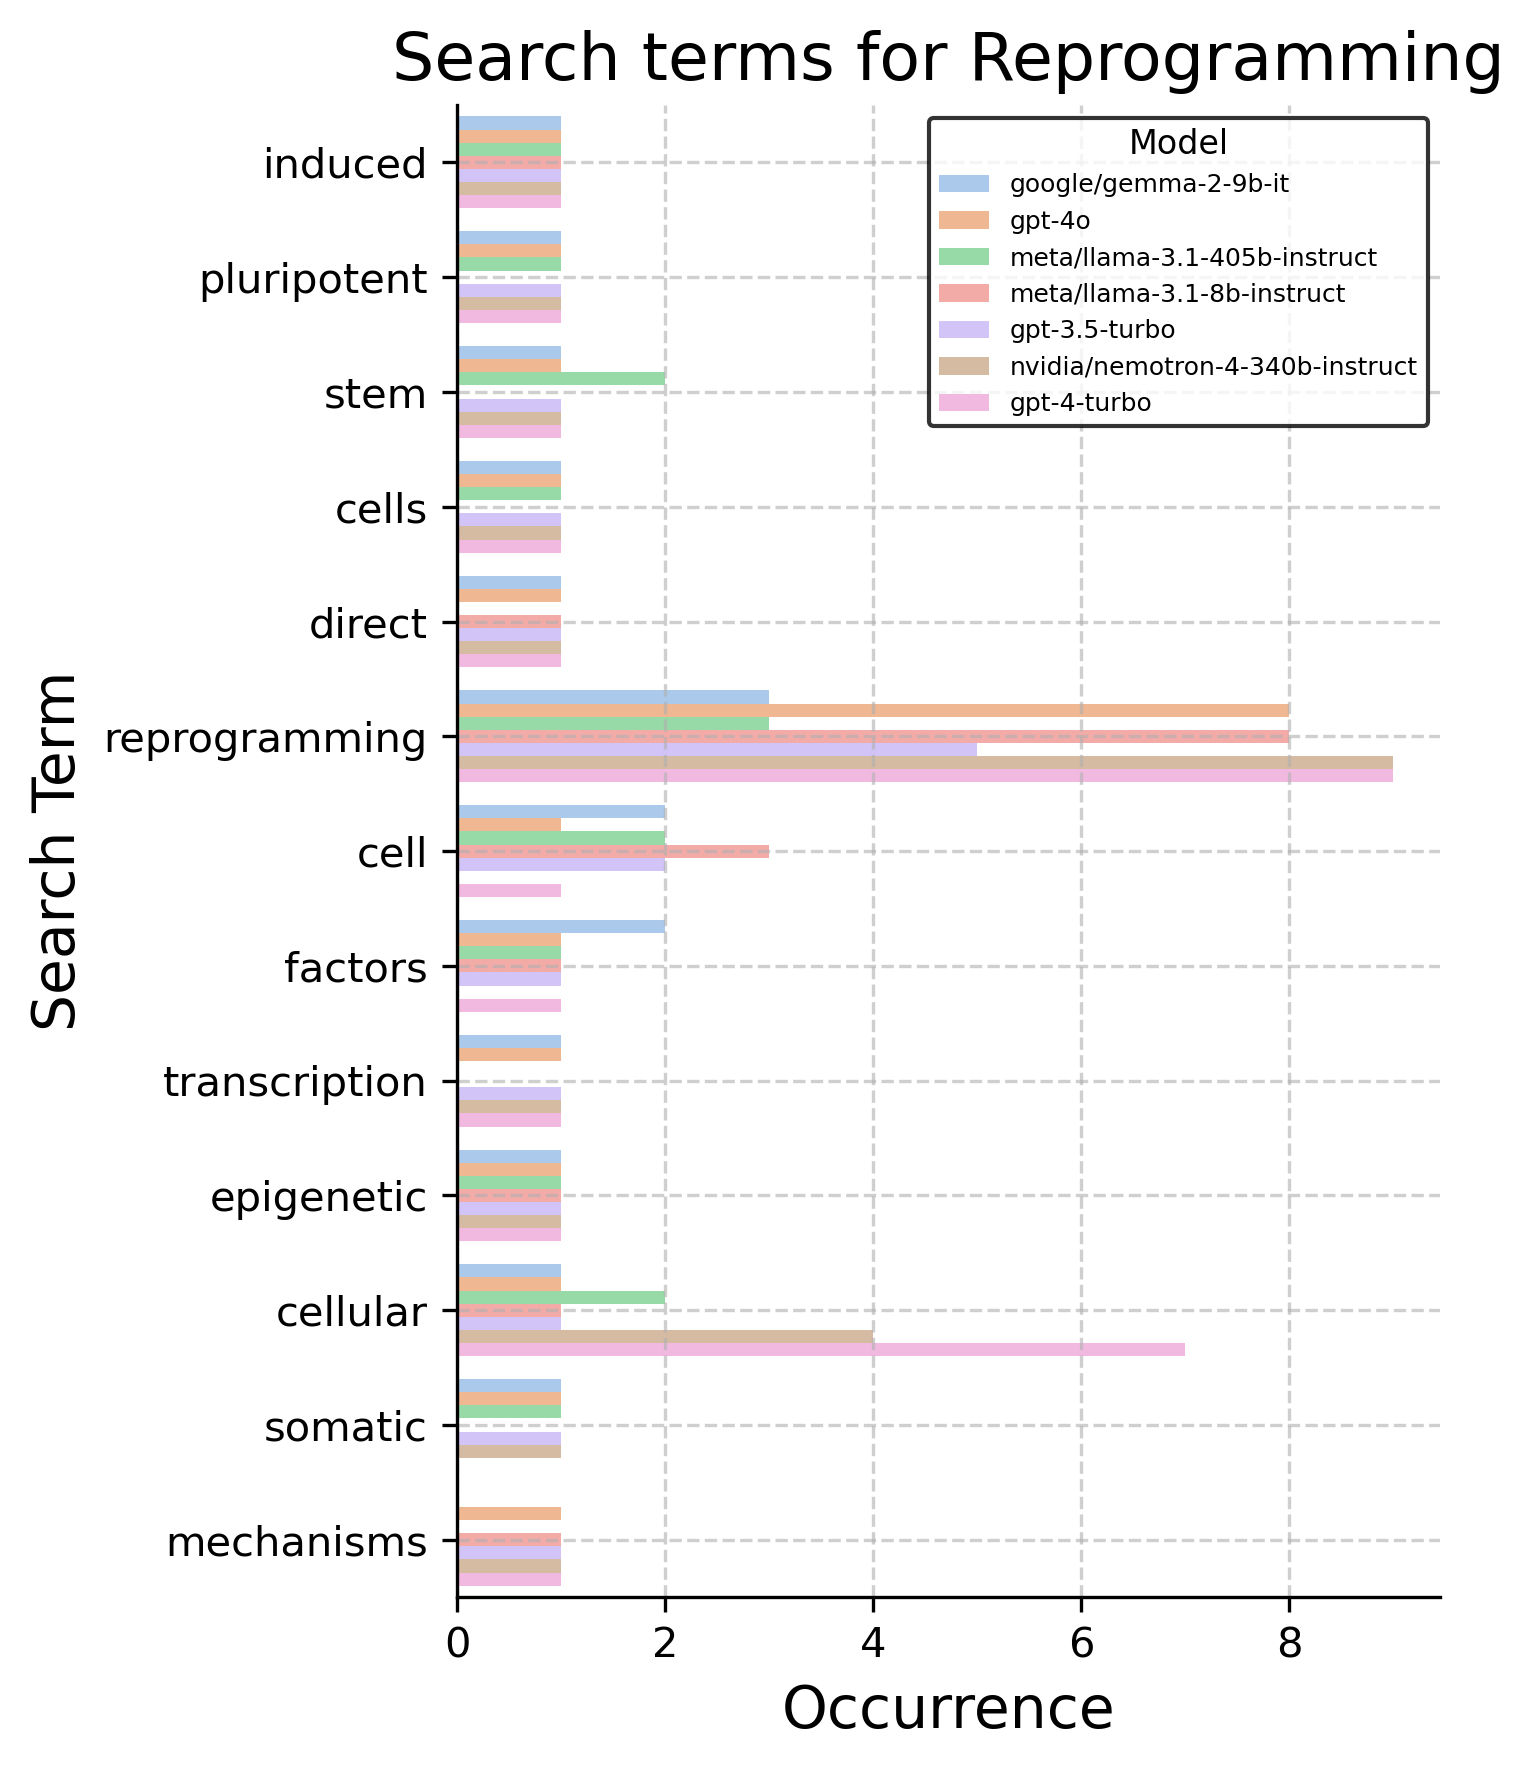

In [6]:
stopwords = ['for',
             'of',
             'in',
             'and']
llm_search_term_matrix = {llm: Counter(results[llm]['words']) for llm in results}
df = pd.DataFrame(llm_search_term_matrix).fillna(0).astype(int)
df = df.reset_index().melt(id_vars='index', var_name='model', value_name='count')
df['word'] = df['index']
df = df[df['count'] != 0]
word_counts = {}
for r in range(df.shape[0]):
    word = df['word'].values[r]
    c    = df['count'].values[r]
    if word not in word_counts.keys():
        word_counts[word] = 0
    word_counts[word] += c
for word, counts in word_counts.items():
    if counts < thresh:
        stopwords.append(word)
df = df[~df['word'].isin(stopwords)]
df
# remove rows with words that do not occur very often (less than 3 times)


# Create the horizontal bar plot
plt.figure(figsize=(5, 6), dpi=300)
ax = sns.barplot(data=df,
                 y='word',  # Swap x and y for horizontal bars
                 x='count',
                 hue='model',
                 palette='pastel')

# Customize the plot
ax.set_title('Search terms for Reprogramming', fontsize=16)
ax.set_xlabel('Occurrence', fontsize=14)
ax.set_ylabel('Search Term', fontsize=14)
ax.legend(title='Model', title_fontsize='8', fontsize='6', edgecolor='k')
sns.despine()  # Remove spines for a cleaner look

# Show grid lines for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

## Foundation Model Search Terms

### Compile Results

In [119]:
import os
import json

logpaths = "/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/foundation-models"
results = {}

# Iterate over each subdirectory in the logpaths
for subdir in os.listdir(logpaths):
    subdir_path = os.path.join(logpaths, subdir)
    if os.path.isdir(subdir_path):
        log_file = os.path.join(subdir_path, "log.json")
        
        # Check if log.json exists in the subdirectory
        print(log_file)
        if os.path.isfile(log_file):
            with open(log_file, 'r') as file:
                data = json.load(file)
                
                # Access the specific location in the JSON structure
                step_data = data['0']["process"]["steps"][0]
                llm = step_data['llm']
                search_term = step_data['parsedOutput']['search_terms']
                words = []
                for term in search_term:
                    words += term.split()
                results[llm] = {
                    'search terms': search_term,
                    'numTerms': len(search_term),
                    'words' : words
                }

# Now results dictionary contains the desired information
print(results)

uniqueTerms, uniqueWords = [], []
for llm in results.keys():
    uniqueTerms = uniqueTerms + results[llm]['search terms']
print(len(uniqueTerms))
uniqueTerms = list(set(uniqueTerms))
print(len(uniqueTerms))
for term in uniqueTerms:
    uniqueWords = uniqueWords + term.split()
uniqueWords = list(set(uniqueWords))
print(len(uniqueWords))


/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/foundation-models/2024-07-23_16-18-45/log.json
/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/foundation-models/2024-07-23_16-16-03/log.json
/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/foundation-models/2024-07-23_16-16-30/log.json
/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/foundation-models/2024-07-23_16-18-35/log.json
/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/foundation-models/2024-07-23_16-18-22/log.json
/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/foundation-models/2024-07-23_16-16-43/log.json
/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/foundation-models/2024-07-23_16-16-12/log.json
{'gpt-3.5-turbo': {'search terms': ['foundation models', 'deep learning architectures', 'neural network structu

### Graphic

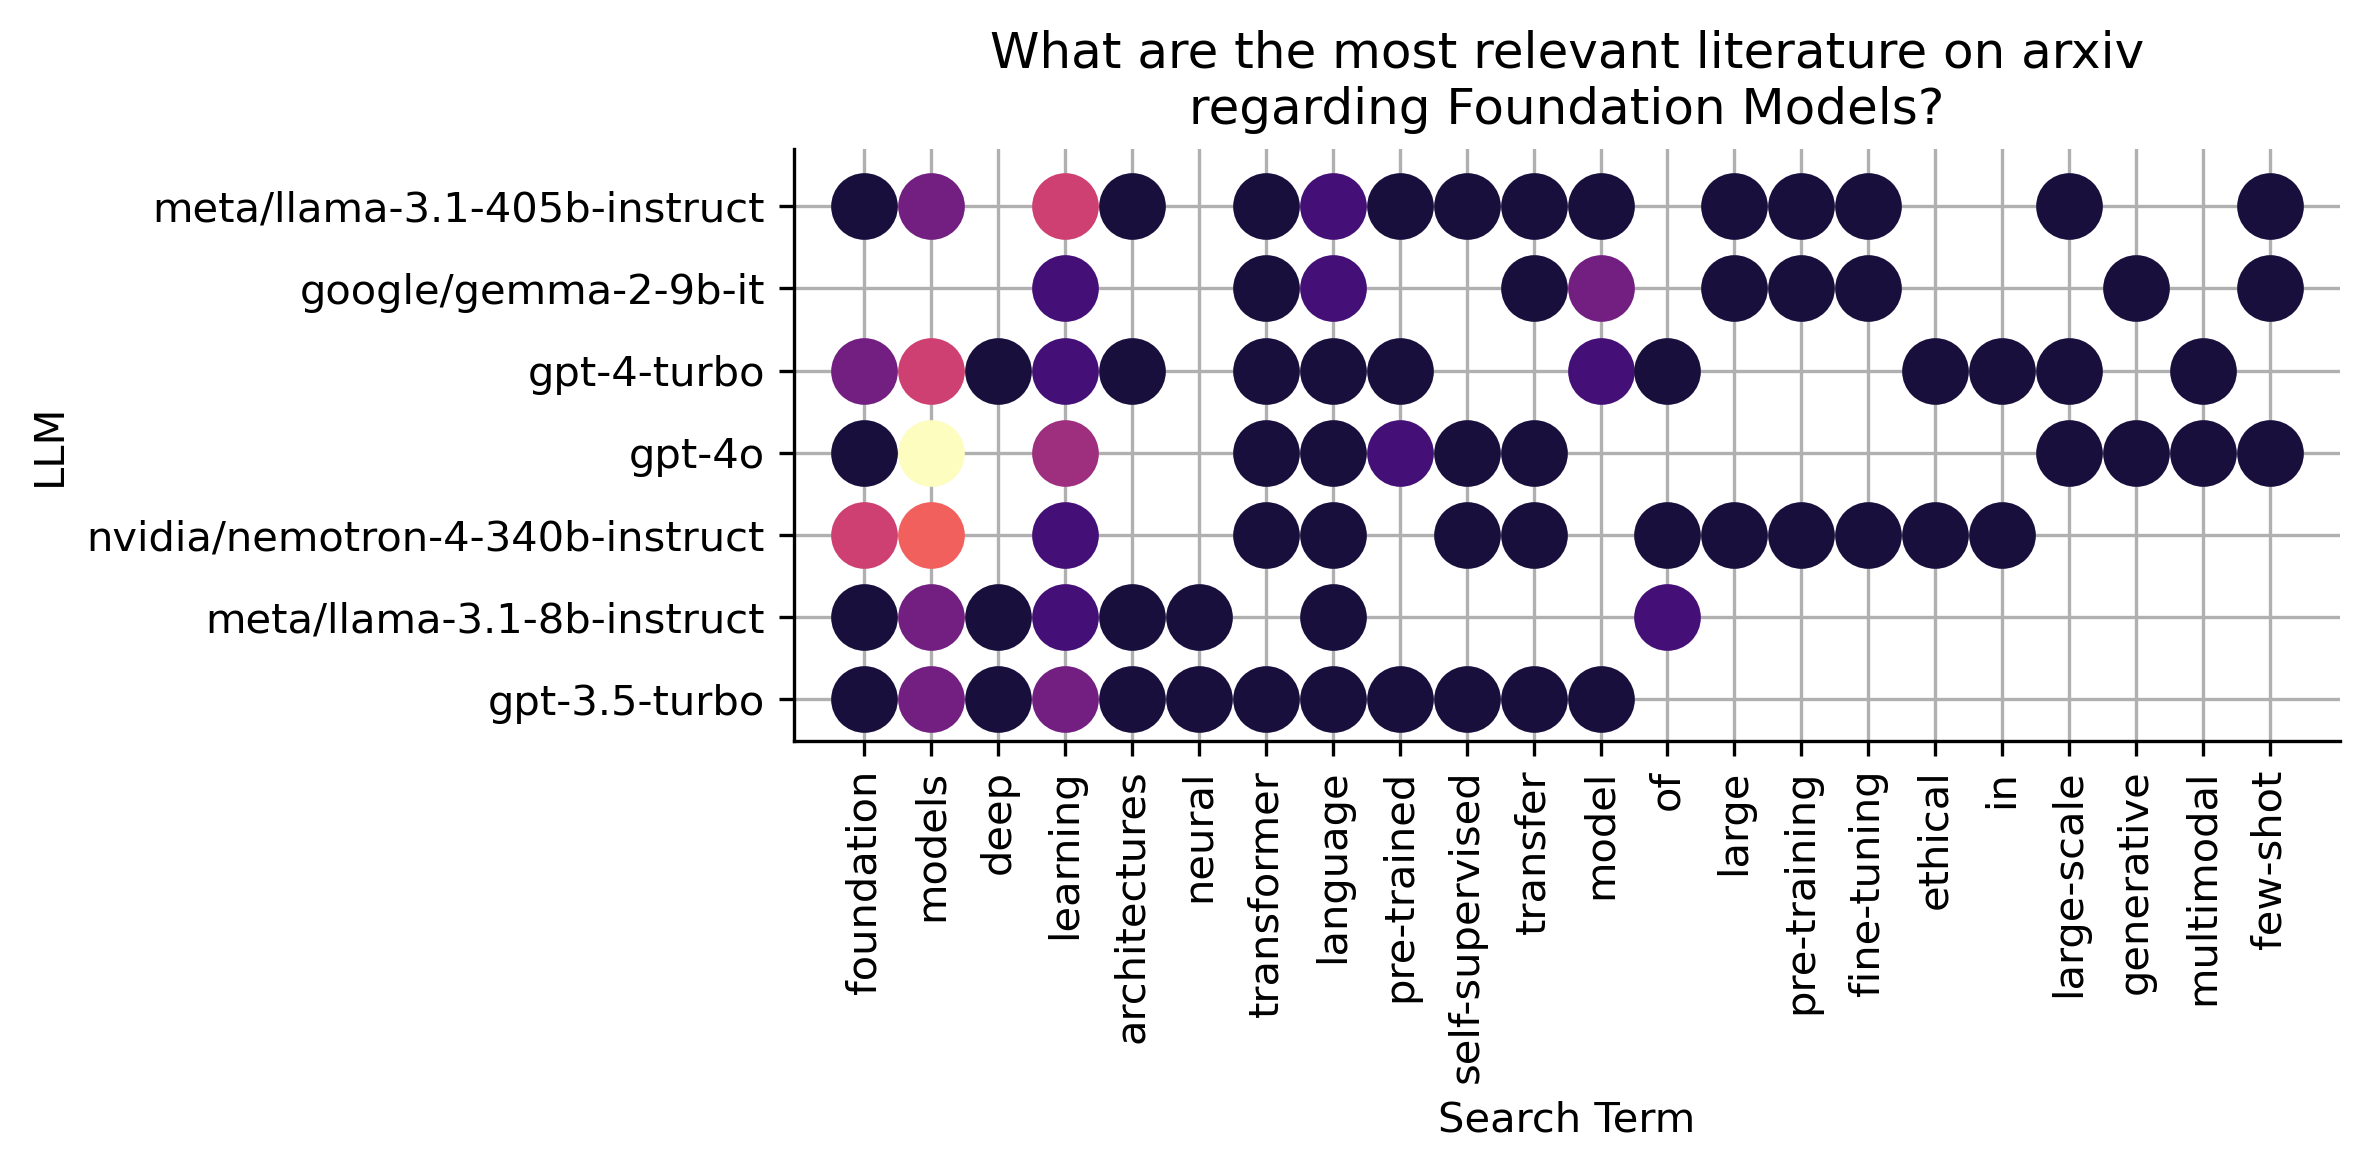

In [29]:
llm_search_term_matrix = {llm: Counter(results[llm]['words']) for llm in results}

# Transform the dictionary into a DataFrame
df = pd.DataFrame(llm_search_term_matrix).fillna(0).astype(int)

# Transpose the DataFrame
df = df.T

# Filter search terms that appear in at least 2 LLMs
filtered_df = df.loc[:, (df > 0).sum(axis=0) >= 2]

# Define a colormap
cmap = plt.get_cmap("magma")

# Get the max frequency for normalization
max_freq = filtered_df.max().max()

# Create a scatter plot
plt.figure(figsize=(8, 4), dpi=300)
plt.grid(True)
for i, llm in enumerate(filtered_df.index):
    for j, term in enumerate(filtered_df.columns):
        if filtered_df.at[llm, term] > 0:
            color = cmap(filtered_df.at[llm, term] / max_freq)
            plt.scatter(j, i, s=225, zorder=10, color=color)

# Add labels and titles
plt.title('What are the most relevant literature on arxiv\nregarding Foundation Models?')
plt.ylabel('LLM')
plt.xlabel('Search Term')

# Set x-ticks and y-ticks
plt.xticks(range(len(filtered_df.columns)), filtered_df.columns, rotation=90)
plt.yticks(range(len(filtered_df.index)), filtered_df.index, rotation=0)
plt.ylim([-0.5, 6.7])
sns.despine()
plt.tight_layout()
plt.savefig('llm-benchmark-foundation-models.png')
plt.show()

### Bar

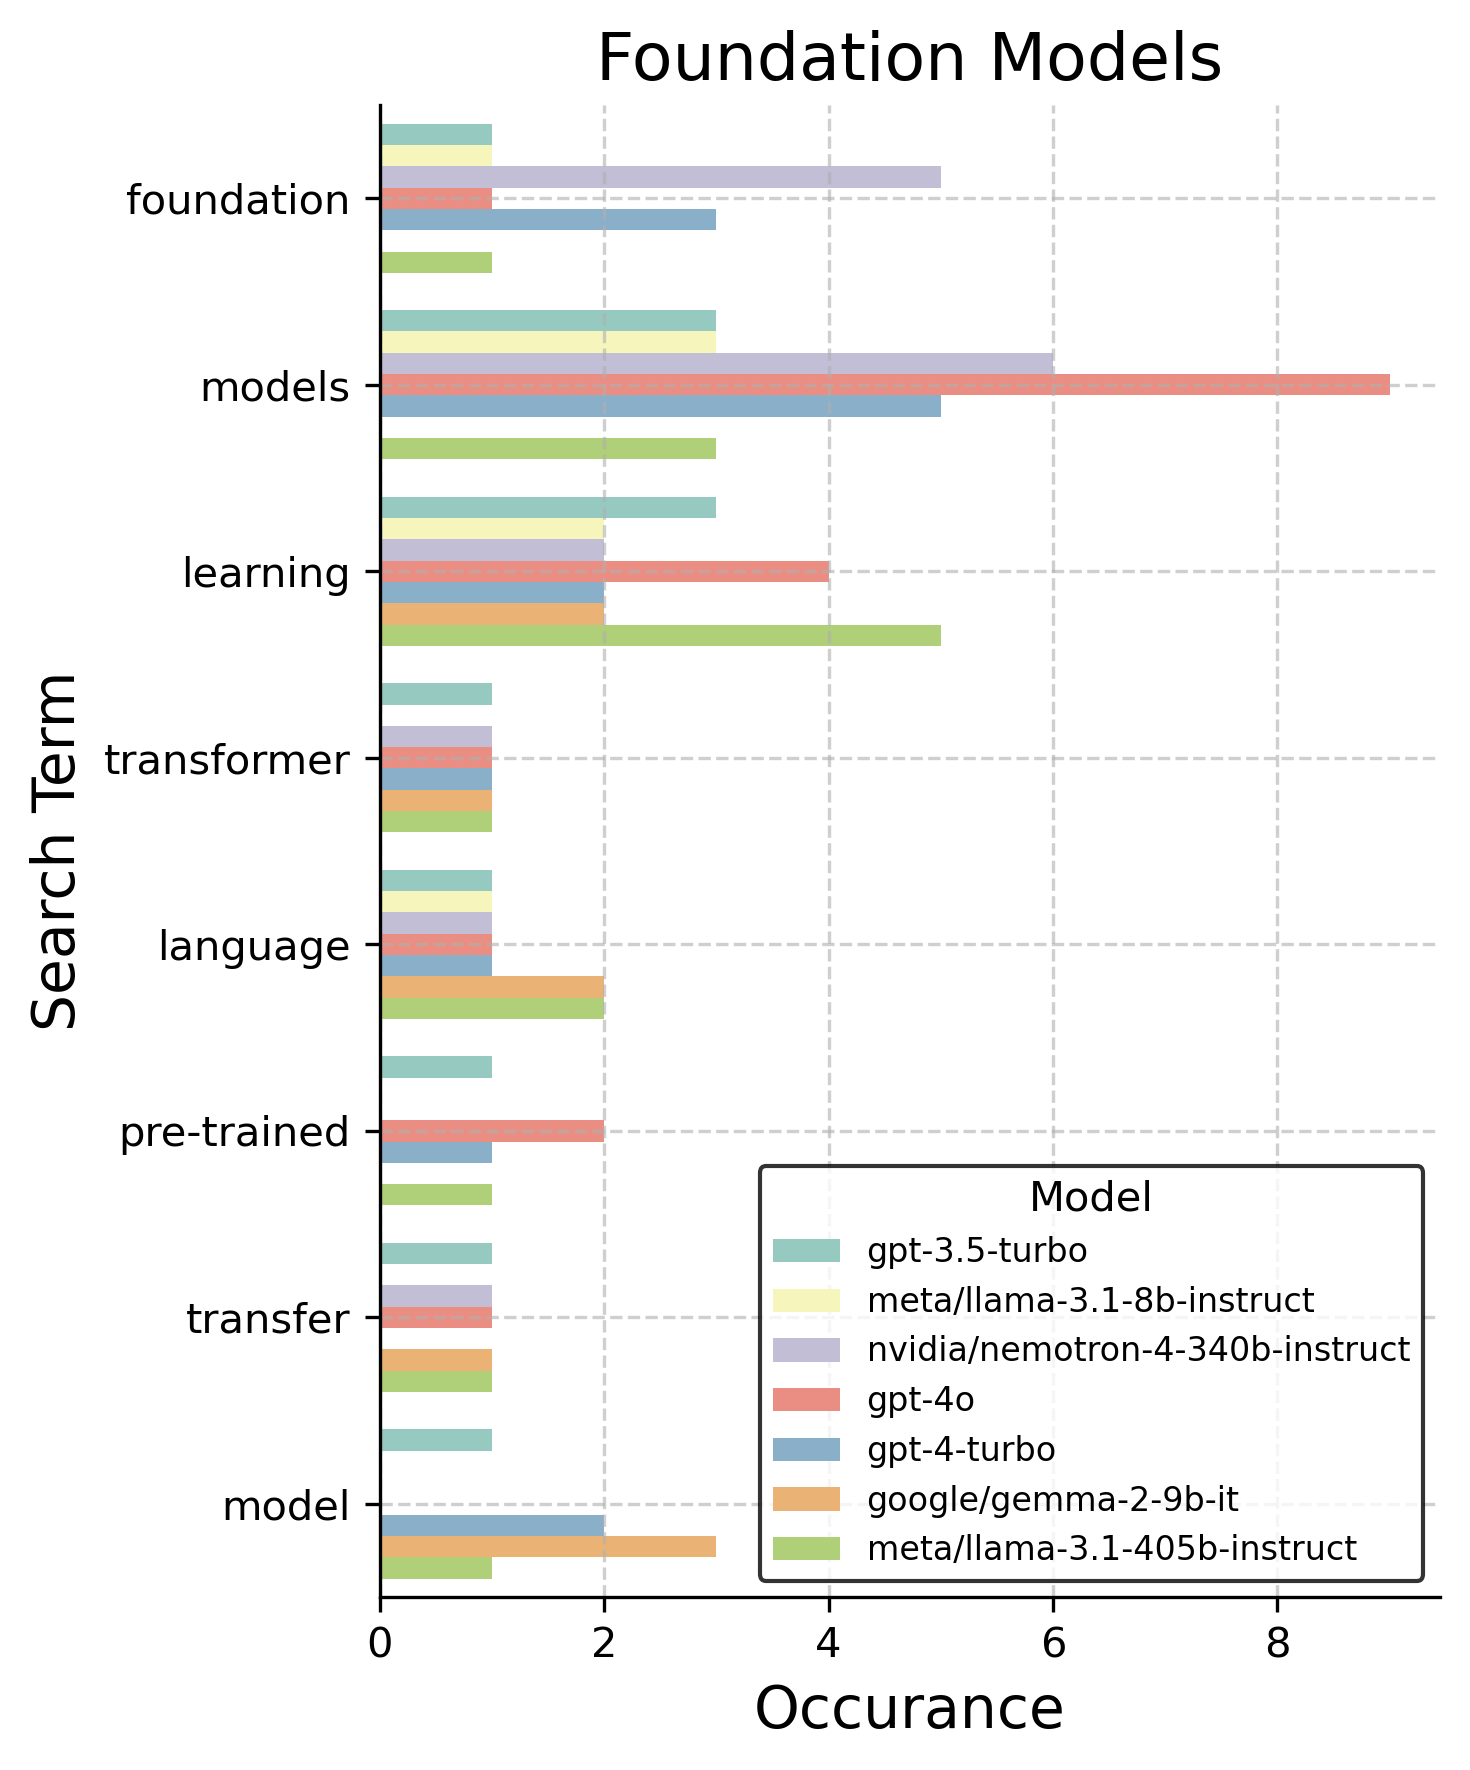

In [128]:
stopwords = ['for',
             'of',
             'in',
             'and']
llm_search_term_matrix = {llm: Counter(results[llm]['words']) for llm in results}
df = pd.DataFrame(llm_search_term_matrix).fillna(0).astype(int)
df = df.reset_index().melt(id_vars='index', var_name='model', value_name='count')
df['word'] = df['index']
df = df[df['count'] != 0]
word_counts = {}
for r in range(df.shape[0]):
    word = df['word'].values[r]
    c    = df['count'].values[r]
    if word not in word_counts.keys():
        word_counts[word] = 0
    word_counts[word] += c
for word, counts in word_counts.items():
    if counts < thresh:
        stopwords.append(word)
df = df[~df['word'].isin(stopwords)]
df
# remove rows with words that do not occur very often (less than 3 times)


# Create the horizontal bar plot
plt.figure(figsize=(5, 6), dpi=300)
ax = sns.barplot(data=df,
                 y='word',  # Swap x and y for horizontal bars
                 x='count',
                 hue='model',
                 palette='Set3')

# Customize the plot
ax.set_title('Foundation Models', fontsize=16)
ax.set_xlabel('Occurance', fontsize=14)
ax.set_ylabel('Search Term', fontsize=14)
ax.legend(title='Model', title_fontsize='10', fontsize='8', edgecolor='k')
sns.despine()  # Remove spines for a cleaner look

# Show grid lines for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

## Pore-C

In [7]:
import os
import json

logpaths = "/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/pore-c"
results = {}

# Iterate over each subdirectory in the logpaths
for subdir in os.listdir(logpaths):
    subdir_path = os.path.join(logpaths, subdir)
    if os.path.isdir(subdir_path):
        log_file = os.path.join(subdir_path, "log.json")
        
        # Check if log.json exists in the subdirectory
        print(log_file)
        if os.path.isfile(log_file):
            with open(log_file, 'r') as file:
                data = json.load(file)
                
                # Access the specific location in the JSON structure
                step_data = data['0']["process"]["steps"][0]
                llm = step_data['llm']
                search_term = step_data['parsedOutput']['search_terms']
                words = []
                for term in search_term:
                    words += term.split()
                results[llm] = {
                    'search terms': search_term,
                    'numTerms': len(search_term),
                    'words' : words
                }

# Now results dictionary contains the desired information
print(results)

uniqueTerms, uniqueWords = [], []
for llm in results.keys():
    uniqueTerms = uniqueTerms + results[llm]['search terms']
print(len(uniqueTerms))
uniqueTerms = list(set(uniqueTerms))
print(len(uniqueTerms))
for term in uniqueTerms:
    uniqueWords = uniqueWords + term.split()
uniqueWords = list(set(uniqueWords))
print(len(uniqueWords))


/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/pore-c/2024-07-23_16-41-14/log.json
/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/pore-c/2024-07-23_16-41-29/log.json
/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/pore-c/2024-07-23_16-39-34/log.json
/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/pore-c/2024-07-23_16-41-22/log.json
/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/pore-c/2024-07-23_16-40-12/log.json
/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/pore-c/2024-07-23_16-40-01/log.json
/nfs/turbo/umms-indikar/shared/projects/BRAD/paper-experiments/webscrape-by-llm/pore-c/2024-07-23_16-39-52/log.json
{'gpt-4-turbo': {'search terms': ['Pore-c technology', 'Pore-c chromatin conformation', 'Pore-c genome architecture', 'Pore-c sequencing', 'Pore-c data analysis', 'Pore-c 3D genome', 'Pore

### Graphics

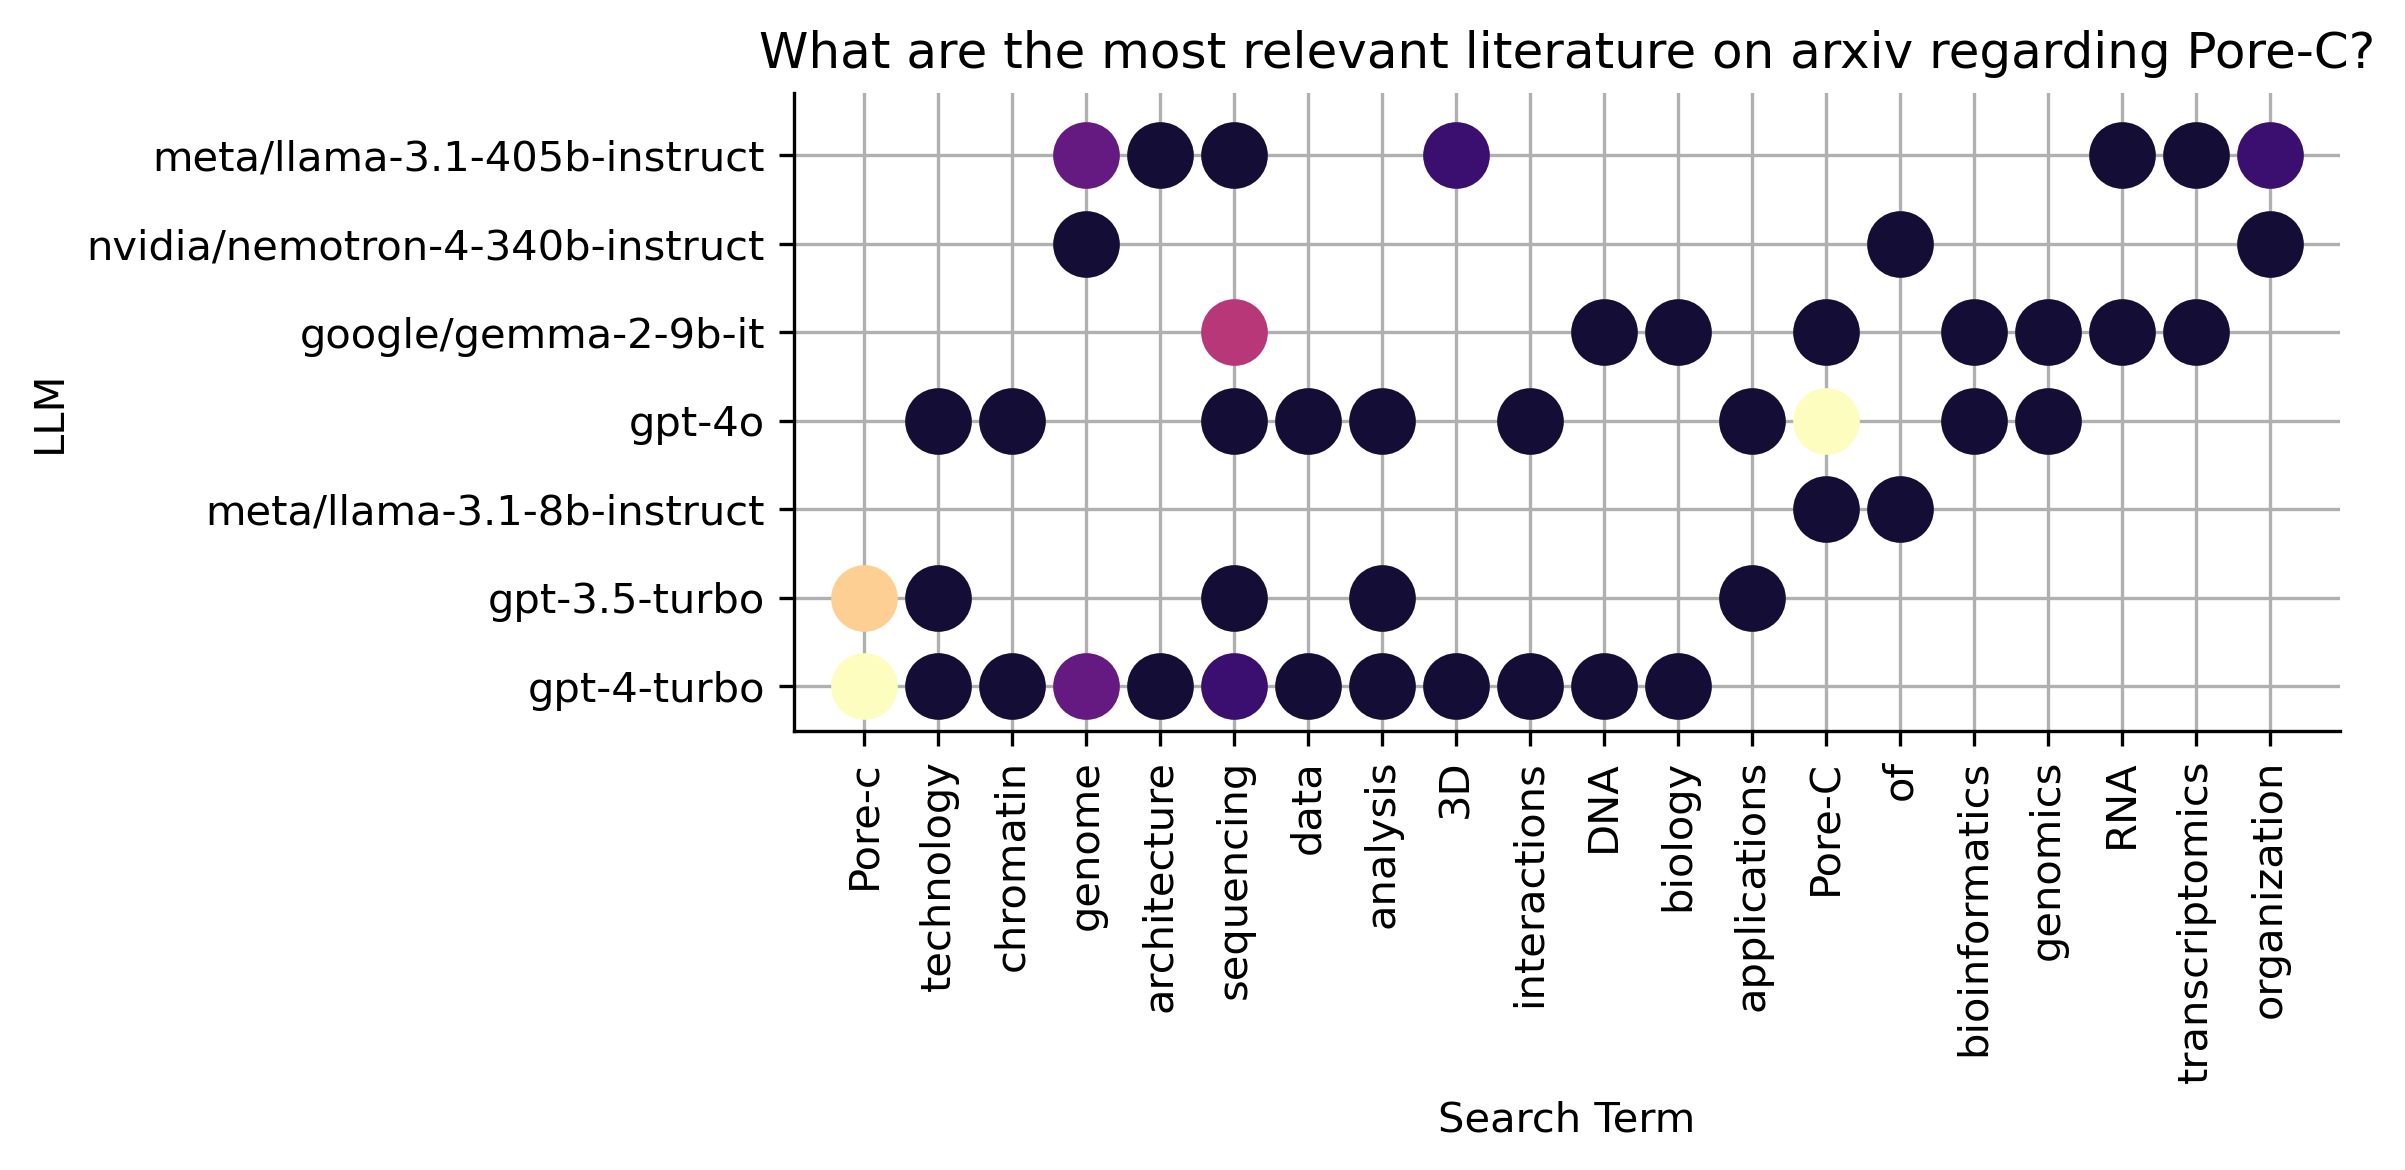

In [15]:
llm_search_term_matrix = {llm: Counter(results[llm]['words']) for llm in results}

# Transform the dictionary into a DataFrame
df = pd.DataFrame(llm_search_term_matrix).fillna(0).astype(int)

# Transpose the DataFrame
df = df.T

# Filter search terms that appear in at least 2 LLMs
filtered_df = df.loc[:, (df > 0).sum(axis=0) >= 2]

# Define a colormap
cmap = plt.get_cmap("magma")

# Get the max frequency for normalization
max_freq = filtered_df.max().max()

# Create a scatter plot
plt.figure(figsize=(8, 4), dpi=300)
plt.grid(True)
for i, llm in enumerate(filtered_df.index):
    for j, term in enumerate(filtered_df.columns):
        if filtered_df.at[llm, term] > 0:
            color = cmap(filtered_df.at[llm, term] / max_freq)
            plt.scatter(j, i, s=225, zorder=10, color=color)

# Add labels and titles
plt.title('What are the most relevant literature on arxiv regarding Pore-C?')
plt.ylabel('LLM')
plt.xlabel('Search Term')

# Set x-ticks and y-ticks
plt.xticks(range(len(filtered_df.columns)), filtered_df.columns, rotation=90)
plt.yticks(range(len(filtered_df.index)), filtered_df.index, rotation=0)
plt.ylim([-0.5, 6.7])
sns.despine()
plt.tight_layout()
plt.savefig('llm-benchmark-Pore-C.png')
plt.show()